In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import time
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
from scipy.fftpack import fft, rfft
import math
from tqdm import tqdm
from scipy.stats import moment
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold
import scipy.stats as st
from scipy.stats import randint as sp_randint
import pickle
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_digits
# sns.palplot(sns.color_palette("Set1", n_colors=8, desat=.5))
warnings.simplefilter(action='ignore', category=FutureWarning)

path="C:/Users/danie/Documents/GitHub/OlgaDanCapstone/GPUProject"
os.chdir(path)
flatui = ["#0033A0", "#C8102E", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.set_palette(flatui)
sns.palplot(sns.color_palette())

In [2]:
# test_file = pd.read_csv('seg_00a37e.csv')
# print("Segment shape", test_file.shape)
# test_file.head()

In [2]:
%%time
train = pd.read_csv('train.csv', dtype={'acoustic_data': np.int16, 'time_to_failure': np.float32})
# test_file = pd.read_csv('seg_00a37e.csv')

Wall time: 1min 43s


In [3]:
pd.set_option("display.precision", 15)  # show more decimals
# train.head()
# train.shape

There are outliers in both directions; let's try to plot the same distribution with x in the range -20 to 30. The black line is the closest normal distribution (gaussian) possible.

## Part I: We will divide the train data set for segments

Group the training data in chunks of 150,000 examples and extract the following features:


In [5]:
# X_train.shape
# y_train.shape

In [6]:
#The Amplitude Spectral Density ASDs are the square root of the power spectral densities (PSDs), 
#which are averages of the square of the fast fourier transforms (FFTs) of the data.

from scipy.fftpack import fft, rfft
import math
from tqdm import tqdm
from scipy.stats import moment
rows = 150000
segments = int(np.floor(train.shape[0] / rows))

X_train = pd.DataFrame(index=range(segments), dtype=np.float64)
y_train = pd.DataFrame(index=range(segments), dtype=np.float64)

for segment in tqdm(range(segments)):
    seg = train.iloc[segment*rows:segment*rows+rows]
    #seg = seg[seg.acoustic_data.between(-20,30)]
    x = seg['acoustic_data']   # pd series
    y = seg['time_to_failure'].values[-1]  # single value
    
    #y_train.loc[segment, 'time_to_failure'] = np.log(y)
    y_train.loc[segment, 'time_to_failure'] = np.sqrt(y)
#     y_train.loc[segment, 'time_to_failure'] = y
    
    
    I_ave10 = 0.1*len(x)
    II_ave10 = 0.2*len(x)
    III_ave10 = 0.3*len(x)
    IV_ave10 = 0.4*len(x)
    V_ave10 = 0.5*len(x)
    VI_ave10 = 0.6*len(x)
    VII_ave10 = 0.7*len(x)
    VIII_ave10 = 0.8*len(x)
    IX_ave10 = 0.9*len(x)
    
            
    #X_train.loc[segment, 'rFFT mean'] = rfft(x).mean()
    #X_train.loc[segment, 'rFFT std'] = rfft(x).std()
       
    #X_train.loc[segment, '0<x<5'] = sum(x.between(0, 5))
    #X_train.loc[segment, '5<x<10'] = sum(x.between(5, 10))    
    #X_train.loc[segment, '10<x<20'] = sum(x.between(10, 20))
    #X_train.loc[segment, '20<x<30'] = sum(x.between(20, 30))
    #X_train.loc[segment, '30<x<100'] = sum(x.between(30, 100))
    #X_train.loc[segment, '100<x<500'] = sum(x.between(100, 500))
    #X_train.loc[segment, '500<x<1000'] = sum(x.between(500, 1000))
    #X_train.loc[segment, '1000<x<5000'] = sum(x.between(1000, 5000))
    
    #X_train.loc[segment, 'skewness'] = moment(x, moment=3)
    #X_train.loc[segment, 'kurtosis'] = moment(x, moment=4)
    #X_train.loc[segment, 'hyperskewness m5'] = moment(x, moment=5)
    #X_train.loc[segment, 'hyperskewness m6'] = moment(x, moment=6)
    #X_train.loc[segment, 'hyperskewness m7'] = moment(x, moment=7)
    #X_train.loc[segment, 'hyperskewness m8'] = moment(x, moment=8)
    #X_train.loc[segment, 'hyperskewness m9'] = moment(x, moment=9)
    #X_train.loc[segment, 'hyperskewness m10'] = moment(x, moment=10)
    #X_train.loc[segment, 'ave'] = x.values.mean()
    X_train.loc[segment, 'std'] = x.values.std()
    #X_train.loc[segment, 'max'] = x.values.max()
    #X_train.loc[segment, 'min'] = x.values.min()
        
    X_train.loc[segment, 'q90'] = np.quantile(x.values, 0.90)
    #X_train.loc[segment, 'q91'] = np.quantile(x.values, 0.91)
    #X_train.loc[segment, 'q92'] = np.quantile(x.values, 0.92)
    #X_train.loc[segment, 'q93'] = np.quantile(x.values, 0.93)
    #X_train.loc[segment, 'q94'] = np.quantile(x.values, 0.94)
    X_train.loc[segment, 'q95'] = np.quantile(x.values, 0.95)
    #X_train.loc[segment, 'q96'] = np.quantile(x.values, 0.96)
    #X_train.loc[segment, 'q97'] = np.quantile(x.values, 0.97)
    #X_train.loc[segment, 'q98'] = np.quantile(x.values, 0.98)
    X_train.loc[segment, 'q99'] = np.quantile(x.values, 0.99)
    #X_train.loc[segment, 'q01'] = np.quantile(x.values, 0.01)
    #X_train.loc[segment, 'q02'] = np.quantile(x.values, 0.02)
    #X_train.loc[segment, 'q03'] = np.quantile(x.values, 0.03)
    #X_train.loc[segment, 'q04'] = np.quantile(x.values, 0.04)
    ##X_train.loc[segment, 'q05'] = np.quantile(x.values, 0.05)
    #X_train.loc[segment, 'q06'] = np.quantile(x.values, 0.06)
    #X_train.loc[segment, 'q07'] = np.quantile(x.values, 0.07)
    #X_train.loc[segment, 'q08'] = np.quantile(x.values, 0.08)
    #X_train.loc[segment, 'q09'] = np.quantile(x.values, 0.09)
    #X_train.loc[segment, 'q50'] = np.quantile(x.values, 0.5)
    
    #X_train.loc[segment, 'abs_max'] = np.abs(x.values).max()
    #X_train.loc[segment, 'abs_mean'] = np.abs(x.values).mean()
    X_train.loc[segment, 'abs_std'] = np.abs(x.values).std()
        
     # New features - rolling features
    for w in [100, 1000, 10000]:
        x_roll_std = x.rolling(w).std().dropna().values
        x_roll_mean = x.rolling(w).mean().dropna().values
        x_roll_abs_mean = x.abs().rolling(w).mean().dropna().values
        
        X_train.loc[segment, 'ave_roll_std_' + str(w)] = x_roll_std.mean()
        X_train.loc[segment, 'std_roll_std_' + str(w)] = x_roll_std.std()
        #X_train.loc[segment, 'max_roll_std_' + str(w)] = x_roll_std.max()
        X_train.loc[segment, 'min_roll_std_' + str(w)] = x_roll_std.min()
        #X_train.loc[segment, 'mean_rFFT_roll_std_' + str(w)] = rfft(x_roll_std).mean()
        #X_train.loc[segment, 'std_rFFT_roll_std_' + str(w)] = rfft(x_roll_std).std()
                        
        #X_train.loc[segment, 'ave_roll_mean_' + str(w)] = x_roll_mean.mean()
        #X_train.loc[segment, 'std_roll_mean_' + str(w)] = x_roll_mean.std()
        #X_train.loc[segment, 'max_roll_mean_' + str(w)] = x_roll_mean.max()
        #X_train.loc[segment, 'min_roll_mean_' + str(w)] = x_roll_mean.min()
        #X_train.loc[segment, 'mean_rFFT_roll_mean_' + str(w)] = rfft(x_roll_mean).mean()
        #X_train.loc[segment, 'std_rFFT_roll_mean_' + str(w)] = rfft(x_roll_mean).std()
               
              
        X_train.loc[segment, 'q01_roll_std_' + str(w)] = np.quantile(x_roll_std, 0.01)
        X_train.loc[segment, 'q05_roll_std_' + str(w)] = np.quantile(x_roll_std, 0.05)
        X_train.loc[segment, 'q10_roll_std_' + str(w)] = np.quantile(x_roll_std, 0.10)
        X_train.loc[segment, 'q90_roll_std_' + str(w)] = np.quantile(x_roll_std, 0.90)
        X_train.loc[segment, 'q95_roll_std_' + str(w)] = np.quantile(x_roll_std, 0.95)
        X_train.loc[segment, 'q99_roll_std_' + str(w)] = np.quantile(x_roll_std, 0.99)
        #X_train.loc[segment, 'q01_roll_mean_' + str(w)] = np.quantile(x_roll_mean, 0.01)
        #X_train.loc[segment, 'q05_roll_mean_' + str(w)] = np.quantile(x_roll_mean, 0.05)
        #X_train.loc[segment, 'q95_roll_mean_' + str(w)] = np.quantile(x_roll_mean, 0.95)
        #X_train.loc[segment, 'q99_roll_mean_' + str(w)] = np.quantile(x_roll_mean, 0.99)
        #X_train.loc[segment, 'ave_roll_abs_mean_' + str(w)] = x_roll_abs_mean.mean()
        X_train.loc[segment, 'std_roll_abs_mean_' + str(w)] = x_roll_abs_mean.std()
        #X_train.loc[segment, 'max_roll_abs_mean_' + str(w)] = x_roll_abs_mean.max()
        #X_train.loc[segment, 'min_roll_abs_mean_' + str(w)] = x_roll_abs_mean.min()
        #X_train.loc[segment, 'q01_roll_abs_mean_' + str(w)] = np.quantile(x_roll_abs_mean, 0.01)
        #X_train.loc[segment, 'q05_roll_abs_mean_' + str(w)] = np.quantile(x_roll_abs_mean, 0.05)
        #X_train.loc[segment, 'q95_roll_abs_mean_' + str(w)] = np.quantile(x_roll_abs_mean, 0.95)
        #X_train.loc[segment, 'q99_roll_abs_mean_' + str(w)] = np.quantile(x_roll_abs_mean, 0.99)

100%|██████████| 209/209 [06:39<00:00,  1.78s/it]


In [7]:
X = X_train
Y = y_train

In [5]:
# X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=.5,random_state=100, shuffle=False)
# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)

X_train= X[:219]
X_test = X[-200:]
y_train = Y[:219]
y_test = Y[-200:]

from sklearn.preprocessing import StandardScaler
scl_obj = StandardScaler()
scl_obj.fit(X_train)
X_train_scaled = scl_obj.transform(X_train)
scl_obj.fit(X_test)
X_test_scaled = scl_obj.transform(X_test)  
scl_obj.fit(X)
X_scaled = scl_obj.transform(X)

In [4]:
# # Load Data
X = pd.read_csv('X.csv',index_col = 0)
Y = pd.read_csv('Y.csv',index_col = 0)
X_train = pd.read_csv('X_train.csv',index_col = 0)
X_test = pd.read_csv('X_test.csv',index_col = 0)
y_train = pd.read_csv('y_train.csv',index_col = 0)
y_test = pd.read_csv('y_test.csv',index_col = 0)
X_train_scaled = np.load('X_train_scaled.npy')
X_test_scaled = np.load('X_test_scaled.npy')
X_scaled = np.load('X_scaled.npy')

# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)
# print(X.shape)

In [5]:
# https://scikit-learn.org/stable/modules/ensemble.html#forest
# The main parameters to adjust when using these methods is n_estimators and max_features.
#n_estimators is the number of trees in the forest. The larger the better, but also the longer it will take to compute.
#In addition, note that results will stop getting significantly better beyond a critical number of trees.
#max_features is the size of the random subsets of features to consider when splitting a node.
#The lower the greater the reduction of variance, but also the greater the increase in bias.
#Empirical good default values are max_features=n_features for regression problems, and
#max_features=sqrt(n_features) for classification tasks (where n_features is the number of features in the data).
#Good results are often achieved when setting max_depth=None in combination with 
#min_samples_split=2 (i.e., when fully developing the trees). 
#Bear in mind though that these values are usually not optimal, and might result in models that consume a lot of RAM.
#The best parameter values should always be cross-validated. In addition, note that in random forests, bootstrap samples are
#used by default (bootstrap=True) while the default strategy for extra-trees is to use the whole dataset (bootstrap=False).
#When using bootstrap sampling the generalization accuracy can be estimated on the left out or out-of-bag samples.
#This can be enabled by setting oob_score=True.


# https://agupubs.onlinelibrary.wiley.com/action/downloadSupplement?doi=10.1002%2F2017GL074677&file=grl56367-sup-0001-supinfo.pdf

#An accelerometer records the acoustic emission (AE) emanating from the shearing layers. 
#The shear stress imposed by the driving block is also monitored as well as other physical parameters such
#as the shearing rate, gouge layer thickness, friction, and the applied load


# The minimum number of samples to generate a split was 30.
# The maximum number of features to consider when making a split was 40 (out of 100 features).
# The forest size was 1000 trees. The performance of the random forest is not sensitive to this choice of
#hyper-parameters: changing any hyper parameter by a factor of 2 typically affects the R2 performance by
#only a few percent.

# To create a model that uncovers the physics of shear failure, we make predictions
# 119 using moving time windows applied to the data. Each window is 1.8s, which is small
# 120 compared to the time between fault gouge failures (8s on average). The offset between
# 121 windows is 0.18s, meaning that consecutive time windows overlap by 90 percent. We
# 122 characterize the acoustical signal in each window by a set of ≈ 50 statistical features (de123 tailed in section “Statistical feature”). Each window is further split in two, and the features are computed for each sub-window to form one data point xi
# 124 , totaling ≈ 100 statis125 tical features. We then label the data point xi according to the time remaining until the
# next gouge failure, yi
# 126 , determined from the stress signal.




# At each node, we select a random subset of 40
# 69 percent of the available features.

# We compute
# 112 regularization hyper-parameters by grid search based on a 3-fold cross-validation.

# grid = {
#     'max_depth': [10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'min_samples_leaf': [10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100],
# #     'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100],
#       'min_samples_split': [30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50],
#     'bootstrap': [True]
# }

grid = {
    'max_depth': [8, 10],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_leaf': [2, 4, 12],
    'min_samples_split': [2, 6, 12],
    }

# rfr = RandomForestRegressor(criterion='mse',n_estimators=1000,n_jobs=-1)
rfr = RandomForestRegressor(criterion='mse',n_estimators=1000,n_jobs=-1)
gs1 = RandomizedSearchCV(rfr, param_distributions = grid)  
gs1.fit(X_train_scaled, y_train.values.ravel())  
gs1.best_params_

C:\Users\danie\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 8}

mean_absolute_error: 1.77940588559803
r2_score: 0.5761379994956297


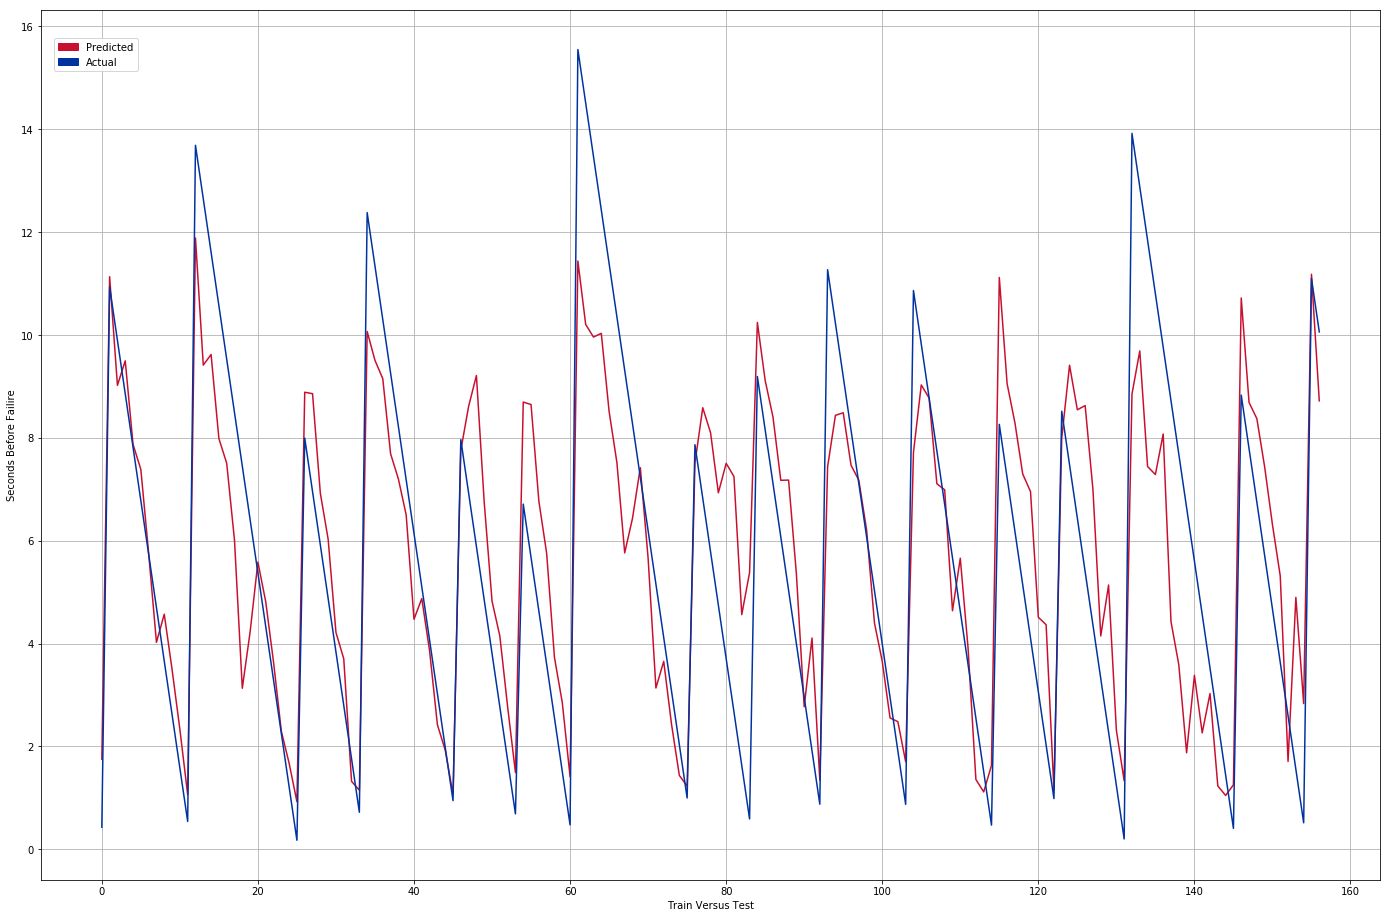

In [6]:
predictions =  gs1.predict(X_test_scaled)
full_predictions = gs1.predict(X_scaled)

y_predict = np.square(predictions)
y_test_nolog = np.square(y_test)
y_nolog = np.square(Y)
y_nolog_predict = np.square(full_predictions)
print('mean_absolute_error:', mean_absolute_error(y_test_nolog, y_predict))
print('r2_score:', r2_score(y_test_nolog, y_predict))

import matplotlib.patches as mpatches

fig, axis = plt.subplots(figsize=(24,16),)
ax3 = axis
ax3.set_xlabel('Train Versus Test')
ax3.set_ylabel('Seconds Before Failire')
ax3.plot(y_nolog_predict, color='#C8102E')
ax3.plot(y_nolog, color='#0033A0')
red_patch = mpatches.Patch(color='#C8102E', label='Predicted')
blue_patch = mpatches.Patch(color='#0033A0', label='Actual')
plt.legend(handles=[red_patch,blue_patch],loc=(0.01, 0.93))
plt.grid(True)
# 1.5 million OBs = mean_absolute_error: 1.6143131003094497
# r2_score: 0.6452998370480423

# 3 Million Obs =

In [ ]:
# train_ad_sample_df = train['acoustic_data'].values[::100]
# train_ttf_sample_df = train['time_to_failure'].values[::100]

train_ad_sample_df = train['acoustic_data']
train_ttf_sample_df = train['time_to_failure']

def plot_acc_ttf_data(train_ad_sample_df, train_ttf_sample_df, title="Laboratory Earthquake Data"):
    fig, ax1 = plt.subplots(figsize=(24,16))
    plt.title(title)
    plt.plot(train_ad_sample_df, color='#0033A0')
    ax1.set_ylabel('Acoustic Signal', color='#0033A0')
    #plt.legend(['acoustic data'], loc=(0.01, 0.95))
    ax2 = ax1.twinx()
    plt.plot(train_ttf_sample_df, color='#C8102E')
    ax2.set_ylabel('Seconds', color='#C8102E')
    #plt.legend(['time to failure'], loc=(0.01, 0.9))
    red_patch = mpatches.Patch(color='#C8102E', label='Time Until Lab Earthquake')
    blue_patch = mpatches.Patch(color='#0033A0', label='Acoustic Signal')
    plt.legend(handles=[red_patch,blue_patch],loc=(0.01, 0.93))
    plt.grid(True)


plot_acc_ttf_data(train_ad_sample_df, train_ttf_sample_df)

In [14]:
# Save data
X.to_csv(r'X.csv')
Y.to_csv(r'Y.csv')
X_train.to_csv(r'X_train.csv')
X_test.to_csv(r'X_test.csv')
y_train.to_csv(r'y_train.csv')
y_test.to_csv(r'y_test.csv')
np.save('X_train_scaled', X_train_scaled)
np.save('X_test_scaled', X_test_scaled)
np.save('X_scaled', X_scaled)

In [ ]:
# Load Model From Disk
full_predictions = pickle.load(open('full_predictions.sav', 'rb'))
predictions = pickle.load(open('predictions.sav', 'rb'))

In [15]:
# Save Model to Disk
filename = 'full_predictions.sav'
pickle.dump(full_predictions, open(filename, 'wb'))
filename = 'predictions.sav'
pickle.dump(predictions, open(filename, 'wb'))
np.savetxt("y_nolog.csv", y_nolog, delimiter=",")
np.savetxt("y_nolog_predict.csv", y_nolog_predict, delimiter=",")

### PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 
                          'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8',
                          'principal component 9','principal component 10'])
principalDf.head()

In [ ]:
pca.explained_variance_ratio_

In [ ]:
X_PCA_train_final = principalDf.values

In [ ]:
from sklearn.model_selection import train_test_split
X_PCA_train, X_PCA_test, y_train, y_test = train_test_split(X_PCA_train_final,Y,test_size=.3,random_state=100, shuffle=True)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
    
scl_obj.fit(X_PCA_train)
X_PCA_train = scl_obj.transform(X_PCA_train)
scl_obj.fit(X_PCA_test)
X_PCA_test = scl_obj.transform(X_PCA_test)
scl_obj.fit(X_PCA_train_final)
X_PCA = scl_obj.transform(X_PCA_train_final)

In [ ]:
grid = {
    'max_depth': [8, 10],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_leaf': [2, 4, 12],
    'min_samples_split': [2, 6, 12],
    #'n_estimators' : st.randint(10000, 20000),
}
#params = grid_search_cv(RandomForestRegressor(criterion='mse', n_estimators=50),
                        #grid, X_train_scaled, target)
rfr = RandomForestRegressor(criterion='mse',n_estimators=1000)
gs7 = RandomizedSearchCV(rfr, param_distributions = grid)  
gs7.fit(X_PCA_train, y_train.values.ravel())  
gs7.best_params_   
#rf_oof = make_predictions(RandomForestRegressor(**params),
                          #X_train_scaled, target)

In [ ]:
predictions =  gs7.predict(X_PCA_test)
full_predictions = gs7.predict(X_PCA)
print('mean_absolute_error_sqrtTime:', mean_absolute_error(y_test, predictions))
print('r2_score_sqrtTime:', r2_score(y_test, predictions))

fig, axis = plt.subplots(1, 3, figsize=(25,5))
ax1, ax2, ax3 = axis
ax1.set_xlabel('actual sqrt train Time')
ax1.set_ylabel('predicted sqrt train Time')
ax2.set_xlabel('train index')
ax2.set_ylabel('sqrt time to failure')
ax3.set_xlabel('train & test index')
ax3.set_ylabel('sqrt time to failure')
ax1.scatter(y_test.values, predictions, color='brown')
ax1.plot([(0, 0), (5, 5)], [(0, 0), (5, 5)], color='blue')
ax2.plot(y_test.values, color='blue')
ax2.plot(predictions, color='red')
ax3.plot(full_predictions, color='red')
ax3.plot(Y, color='blue')

In [ ]:
y_predict = np.square(predictions)
y_test_nolog = np.square(y_test)
y_nolog = np.square(Y)
y_nolog_predict = np.square(full_predictions)
print('mean_absolute_error:', mean_absolute_error(y_test_nolog, y_predict))
print('r2_score:', r2_score(y_test_nolog, y_predict))

fig, axis = plt.subplots(1, 3, figsize=(25,5))
ax1, ax2, ax3 = axis
ax1.set_xlabel('actual')
ax1.set_ylabel('predicted')
ax2.set_xlabel('train index')
ax2.set_ylabel('time to failure')
ax3.set_xlabel('train & test index')
ax3.set_ylabel('time to failure')
ax1.scatter(y_test_nolog.values, y_predict, color='brown')
ax1.plot([(0, 0), (20, 20)], [(0, 0), (20, 20)], color='blue')
ax2.plot(y_test_nolog.values, color='blue')
ax2.plot(y_predict, color='red')
ax3.plot(y_nolog, color='blue')
ax3.plot(y_nolog_predict, color='red')

In [ ]:
import scipy.stats as st
from xgboost.sklearn import XGBRegressor

one_to_left = st.beta(10, 1)  
from_zero_positive = st.expon(0, 50)

params = {  
    #"n_estimators": st.randint(10000, 20000),
    "max_depth": st.randint(3, 40),
    "learning_rate": st.uniform(0.01, 0.4),
    "colsample_bytree": one_to_left,
    "subsample": one_to_left,
    "gamma": st.uniform(0, 10),
    'reg_alpha': from_zero_positive,
    "min_child_weight": from_zero_positive,
}

xgbreg = XGBRegressor(nthreads=-1,n_estimators=500, cv=5)  
gs8 = RandomizedSearchCV(xgbreg, params)  
gs8.fit(X_PCA_train, y_train.values.ravel())  
gs8.best_params_

In [ ]:
predictions =  gs8.predict(X_PCA_test)
full_predictions = gs8.predict(X_PCA)
print('mean_absolute_error_sqrtTime:', mean_absolute_error(y_test, predictions))
print('r2_score_sqrtTime:', r2_score(y_test, predictions))

fig, axis = plt.subplots(1, 3, figsize=(25,5))
ax1, ax2, ax3 = axis
ax1.set_xlabel('actual sqrt train Time')
ax1.set_ylabel('predicted sqrt train Time')
ax2.set_xlabel('train index')
ax2.set_ylabel('sqrt time to failure')
ax3.set_xlabel('train & test index')
ax3.set_ylabel('sqrt time to failure')
ax1.scatter(y_test.values, predictions, color='brown')
ax1.plot([(0, 0), (5, 5)], [(0, 0), (5, 5)], color='blue')
ax2.plot(y_test.values, color='blue')
ax2.plot(predictions, color='red')
ax3.plot(full_predictions, color='red')
ax3.plot(Y, color='blue')

In [ ]:
y_predict = np.square(predictions)
y_test_nolog = np.square(y_test)
y_nolog = np.square(Y)
y_nolog_predict = np.square(full_predictions)
print('mean_absolute_error:', mean_absolute_error(y_test_nolog, y_predict))
print('r2_score:', r2_score(y_test_nolog, y_predict))

fig, axis = plt.subplots(1, 3, figsize=(25,5))
ax1, ax2, ax3 = axis
ax1.set_xlabel('actual')
ax1.set_ylabel('predicted')
ax2.set_xlabel('train index')
ax2.set_ylabel('time to failure')
ax3.set_xlabel('train & test index')
ax3.set_ylabel('time to failure')
ax1.scatter(y_test_nolog.values, y_predict, color='brown')
ax1.plot([(0, 0), (20, 20)], [(0, 0), (20, 20)], color='blue')
ax2.plot(y_test_nolog.values, color='blue')
ax2.plot(y_predict, color='red')
ax3.plot(y_nolog, color='blue')
ax3.plot(y_nolog_predict, color='red')

In [ ]:
#The values of this array sum to 1, unless all trees are single node trees consisting of only the root node, 
#in which case it will be an array of zeros.
model = XGBRegressor(nthreads=-1,n_estimators=500,colsample_bytree=0.8385749300087559,gamma=4.711994964749211,
                     learning_rate=0.02198803862710416,max_depth=17,min_child_weight=114.35959341213693,
                     reg_alpha=59.19676051250868,subsample=0.9732956894126421)
model.fit(X_PCA_train, y_train)

fold_importance_df = pd.DataFrame()
feature_importance_df = pd.DataFrame()
fold_importance_df["Feature"] = principalDf.columns
fold_importance_df["importance"] = model.feature_importances_[:len(principalDf.columns)]
feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
cols = (feature_importance_df[["Feature", "importance"]]
        .groupby("Feature")
        .mean()
        .sort_values(by="importance", ascending=False)[:200].index)
best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]

plt.figure(figsize=(14,26))
sns.barplot(x="importance", y="Feature", data=best_features.sort_values(by="importance",ascending=False))
plt.title('XGBRegressor Features')
plt.tight_layout()
plt.savefig('XGBRegressor_importances.png')

In [ ]:
from sklearn.tree import DecisionTreeRegressor

grid = {
    'max_depth': st.randint(4,12),
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_leaf': st.randint(2,12),
    'min_samples_split': st.randint(10,100),
}
#params = grid_search_cv(DecisionTreeRegressor(criterion='mae'),
                        #grid, X_train_scaled, target)
#rf_oof = make_predictions(DecisionTreeRegressor(splitter='random', **params),
                         # X_train_scaled, target)
    
rfr = DecisionTreeRegressor(criterion='mae')
gs9 = RandomizedSearchCV(rfr, param_distributions = grid)  
gs9.fit(X_PCA_train, y_train.values.ravel())  
gs9.best_params_ 

In [ ]:
predictions =  gs9.predict(X_PCA_test)
full_predictions = gs9.predict(X_PCA)
print('mean_absolute_error_sqrtTime:', mean_absolute_error(y_test, predictions))
print('r2_score_sqrtTime:', r2_score(y_test, predictions))

fig, axis = plt.subplots(1, 3, figsize=(25,5))
ax1, ax2, ax3 = axis
ax1.set_xlabel('actual sqrt train Time')
ax1.set_ylabel('predicted sqrt train Time')
ax2.set_xlabel('train index')
ax2.set_ylabel('sqrt time to failure')
ax3.set_xlabel('train & test index')
ax3.set_ylabel('sqrt time to failure')
ax1.scatter(y_test.values, predictions, color='brown')
ax1.plot([(0, 0), (5, 5)], [(0, 0), (5, 5)], color='blue')
ax2.plot(y_test.values, color='blue')
ax2.plot(predictions, color='red')
ax3.plot(full_predictions, color='red')
ax3.plot(Y, color='blue')

In [ ]:
y_predict = np.square(predictions)
y_test_nolog = np.square(y_test)
y_nolog = np.square(Y)
y_nolog_predict = np.square(full_predictions)
print('mean_absolute_error:', mean_absolute_error(y_test_nolog, y_predict))
print('r2_score:', r2_score(y_test_nolog, y_predict))

fig, axis = plt.subplots(1, 3, figsize=(25,5))
ax1, ax2, ax3 = axis
ax1.set_xlabel('actual')
ax1.set_ylabel('predicted')
ax2.set_xlabel('train index')
ax2.set_ylabel('time to failure')
ax3.set_xlabel('train & test index')
ax3.set_ylabel('time to failure')
ax1.scatter(y_test_nolog.values, y_predict, color='brown')
ax1.plot([(0, 0), (20, 20)], [(0, 0), (20, 20)], color='blue')
ax2.plot(y_test_nolog.values, color='blue')
ax2.plot(y_predict, color='red')
ax3.plot(y_nolog, color='blue')
ax3.plot(y_nolog_predict, color='red')

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

grid = {
    #'max_depth': [4, 6, 8, 10, 12],
    #'max_features': ['auto', 'sqrt', 'log2'],
    #'min_samples_leaf': [2, 4, 12],
    #'min_samples_split': [4,8,12,16,20, 30, 40, 50, 60],
    "learning_rate": st.uniform(0.01, 0.4),
    'loss' : ["square"],
    #'n_estimators' : st.randint(10000, 20000)
}
#params = grid_search_cv(AdaBoostRegressor(),
                        #grid, X_train_scaled, target)
#rf_oof = make_predictions(AdaBoostRegressor(**params),
                          #X_train_scaled, target)
base = Ridge(alpha=1) 
rfr = AdaBoostRegressor(n_estimators = 500, base_estimator=base)
gs10 = RandomizedSearchCV(rfr, param_distributions = grid)  
gs10.fit(X_PCA_train, y_train.values.ravel())  
gs10.best_params_ 

In [ ]:
predictions =  gs10.predict(X_PCA_test)
full_predictions = gs10.predict(X_PCA)
print('mean_absolute_error_sqrtTime:', mean_absolute_error(y_test, predictions))
print('r2_score_sqrtTime:', r2_score(y_test, predictions))

fig, axis = plt.subplots(1, 3, figsize=(25,5))
ax1, ax2, ax3 = axis
ax1.set_xlabel('actual sqrt train Time')
ax1.set_ylabel('predicted sqrt train Time')
ax2.set_xlabel('train index')
ax2.set_ylabel('sqrt time to failure')
ax3.set_xlabel('train & test index')
ax3.set_ylabel('sqrt time to failure')
ax1.scatter(y_test.values, predictions, color='brown')
ax1.plot([(0, 0), (5, 5)], [(0, 0), (5, 5)], color='blue')
ax2.plot(y_test.values, color='blue')
ax2.plot(predictions, color='red')
ax3.plot(full_predictions, color='red')
ax3.plot(Y, color='blue')

In [ ]:
y_predict = np.square(predictions)
y_test_nolog = np.square(y_test)
y_nolog = np.square(Y)
y_nolog_predict = np.square(full_predictions)
print('mean_absolute_error:', mean_absolute_error(y_test_nolog, y_predict))
print('r2_score:', r2_score(y_test_nolog, y_predict))

fig, axis = plt.subplots(1, 3, figsize=(25,5))
ax1, ax2, ax3 = axis
ax1.set_xlabel('actual')
ax1.set_ylabel('predicted')
ax2.set_xlabel('train index')
ax2.set_ylabel('time to failure')
ax3.set_xlabel('train & test index')
ax3.set_ylabel('time to failure')
ax1.scatter(y_test_nolog.values, y_predict, color='brown')
ax1.plot([(0, 0), (20, 20)], [(0, 0), (20, 20)], color='blue')
ax2.plot(y_test_nolog.values, color='blue')
ax2.plot(y_predict, color='red')
ax3.plot(y_nolog, color='blue')
ax3.plot(y_nolog_predict, color='red')

In [ ]:
import lightgbm as lgb
import scipy.stats as st

grid = {
     'learning_rate': [0.1, 0.05, 0.01, 0.005],
    'num_leaves': list(range(8, 92, 4)),
    'max_depth': [3, 4, 5, 6, 8, 12, 16, -1],
    'feature_fraction': [0.8, 0.85, 0.9, 0.95, 1],
    'subsample': [0.8, 0.85, 0.9, 0.95, 1],
    'lambda_l1': [0, 0.1, 0.2, 0.4, 0.6, 0.9],
    'lambda_l2': [0, 0.1, 0.2, 0.4, 0.6, 0.9],
    'min_data_in_leaf': [10, 20, 40, 60, 100],
    'min_gain_to_split': [0, 0.001, 0.01, 0.1],
    'random_seed': st.randint(10, 100),
    }
#params = grid_search_cv(RandomForestRegressor(criterion='mse', n_estimators=50),
                        #grid, X_train_scaled, target)
rfr = lgb.LGBMRegressor(n_estimators=10000)
gs11 = RandomizedSearchCV(rfr, param_distributions = grid)  
gs11.fit(X_PCA_train, y_train.values.ravel())  
gs11.best_params_    
#rf_oof = make_predictions(RandomForestRegressor(**params),
                          #X_train_scaled, target)

In [ ]:
predictions =  gs11.predict(X_PCA_test)
full_predictions = gs11.predict(X_PCA)
print('mean_absolute_error_sqrtTime:', mean_absolute_error(y_test, predictions))
print('r2_score_sqrtTime:', r2_score(y_test, predictions))

fig, axis = plt.subplots(1, 3, figsize=(25,5))
ax1, ax2, ax3 = axis
ax1.set_xlabel('actual sqrt train Time')
ax1.set_ylabel('predicted sqrt train Time')
ax2.set_xlabel('train index')
ax2.set_ylabel('sqrt time to failure')
ax3.set_xlabel('train & test index')
ax3.set_ylabel('sqrt time to failure')
ax1.scatter(y_test.values, predictions, color='brown')
ax1.plot([(0, 0), (5, 5)], [(0, 0), (5, 5)], color='blue')
ax2.plot(y_test.values, color='blue')
ax2.plot(predictions, color='red')
ax3.plot(full_predictions, color='red')
ax3.plot(Y, color='blue')

In [ ]:
y_predict = np.square(predictions)
y_test_nolog = np.square(y_test)
y_nolog = np.square(Y)
y_nolog_predict = np.square(full_predictions)
print('mean_absolute_error:', mean_absolute_error(y_test_nolog, y_predict))
print('r2_score:', r2_score(y_test_nolog, y_predict))

fig, axis = plt.subplots(1, 3, figsize=(25,5))
ax1, ax2, ax3 = axis
ax1.set_xlabel('actual')
ax1.set_ylabel('predicted')
ax2.set_xlabel('train index')
ax2.set_ylabel('time to failure')
ax3.set_xlabel('train & test index')
ax3.set_ylabel('time to failure')
ax1.scatter(y_test_nolog.values, y_predict, color='brown')
ax1.plot([(0, 0), (20, 20)], [(0, 0), (20, 20)], color='blue')
ax2.plot(y_test_nolog.values, color='blue')
ax2.plot(y_predict, color='red')
ax3.plot(y_nolog, color='blue')
ax3.plot(y_nolog_predict, color='red')

In [ ]:
from sklearn import ensemble
from sklearn.ensemble import ExtraTreesRegressor

grid = {
    'max_depth': [6,11,15,20],
    'max_features': ['auto'],
    'min_samples_leaf': [10,16,20,40],
    'min_samples_split': [50,98,150,200],
    'n_estimators': [100, 200, 495,1000],
    'min_weight_fraction_leaf':  st.uniform(0, 0.5)
    }

etr = ExtraTreesRegressor(criterion='mae')
gs12 = RandomizedSearchCV(etr, param_distributions = grid)  
gs12.fit(X_PCA_train, y_train.values.ravel())  
gs12.best_params_ 

In [ ]:
predictions =  gs12.predict(X_PCA_test)
full_predictions = gs12.predict(X_PCA)
print('mean_absolute_error_sqrtTime:', mean_absolute_error(y_test, predictions))
print('r2_score_sqrtTime:', r2_score(y_test, predictions))

fig, axis = plt.subplots(1, 3, figsize=(25,5))
ax1, ax2, ax3 = axis
ax1.set_xlabel('actual sqrt train Time')
ax1.set_ylabel('predicted sqrt train Time')
ax2.set_xlabel('train index')
ax2.set_ylabel('sqrt time to failure')
ax3.set_xlabel('train & test index')
ax3.set_ylabel('sqrt time to failure')
ax1.scatter(y_test.values, predictions, color='brown')
ax1.plot([(0, 0), (5, 5)], [(0, 0), (5, 5)], color='blue')
ax2.plot(y_test.values, color='blue')
ax2.plot(predictions, color='red')
ax3.plot(full_predictions, color='red')
ax3.plot(Y, color='blue')

In [ ]:
y_predict = np.square(predictions)
y_test_nolog = np.square(y_test)
y_nolog = np.square(Y)
y_nolog_predict = np.square(full_predictions)
print('mean_absolute_error:', mean_absolute_error(y_test_nolog, y_predict))
print('r2_score:', r2_score(y_test_nolog, y_predict))

fig, axis = plt.subplots(1, 3, figsize=(25,5))
ax1, ax2, ax3 = axis
ax1.set_xlabel('actual')
ax1.set_ylabel('predicted')
ax2.set_xlabel('train index')
ax2.set_ylabel('time to failure')
ax3.set_xlabel('train & test index')
ax3.set_ylabel('time to failure')
ax1.scatter(y_test_nolog.values, y_predict, color='brown')
ax1.plot([(0, 0), (20, 20)], [(0, 0), (20, 20)], color='blue')
ax2.plot(y_test_nolog.values, color='blue')
ax2.plot(y_predict, color='red')
ax3.plot(y_nolog, color='blue')
ax3.plot(y_nolog_predict, color='red')

## Submission

In [ ]:
submission = pd.read_csv('../input/sample_submission.csv', index_col='seg_id')
X_test = pd.DataFrame(columns=X.columns, dtype=np.float64, index=submission.index)

In [ ]:
for seg_id in X_test.index:
    seg = pd.read_csv('../input/test/' + seg_id + '.csv')
    
    x = seg['acoustic_data']  # pd series
            
    I_ave10 = 0.1*len(x)
    II_ave10 = 0.2*len(x)
    III_ave10 = 0.3*len(x)
    IV_ave10 = 0.4*len(x)
    V_ave10 = 0.5*len(x)
    VI_ave10 = 0.6*len(x)
    VII_ave10 = 0.7*len(x)
    VIII_ave10 = 0.8*len(x)
    IX_ave10 = 0.9*len(x)
    
    X_test.loc[seg_id, 'rFFT mean'] = rfft(x).mean()
    X_test.loc[seg_id, 'rFFT std'] = rfft(x).std()
    
    X_test.loc[seg_id, '0<x<5'] = sum(x.between(0, 5))
    X_test.loc[seg_id, '5<x<10'] = sum(x.between(5, 10))    
    X_test.loc[seg_id, '10<x<20'] = sum(x.between(10, 20))
    X_test.loc[seg_id, '20<x<30'] = sum(x.between(20, 30))
    X_test.loc[seg_id, '30<x<100'] = sum(x.between(30, 100))
    X_test.loc[seg_id, '100<x<500'] = sum(x.between(100, 500))
    X_test.loc[seg_id, '500<x<1000'] = sum(x.between(500, 1000))
    X_test.loc[seg_id, '1000<x<5000'] = sum(x.between(1000, 5000))
    
    X_test.loc[seg_id, 'skewness'] = moment(x, moment=3)
    X_test.loc[seg_id, 'kurtosis'] = moment(x, moment=4)
    X_test.loc[seg_id, 'hypermoment'] = moment(x, moment=5)
    X_test.loc[seg_id, 'hypermoment2'] = moment(x, moment=6)
    X_test.loc[seg_id, 'ave'] = x.values.mean()
    X_test.loc[seg_id, 'std'] = x.values.std()
    X_test.loc[seg_id, 'max'] = x.values.max()
    X_test.loc[seg_id, 'min'] = x.values.min()
        
    X_test.loc[seg_id, 'q90'] = np.quantile(x.values, 0.90)
    X_test.loc[seg_id, 'q95'] = np.quantile(x.values, 0.95)
    X_test.loc[seg_id, 'q99'] = np.quantile(x.values, 0.99)
    X_test.loc[seg_id, 'q05'] = np.quantile(x.values, 0.05)
    X_test.loc[seg_id, 'q10'] = np.quantile(x.values, 0.10)
    X_test.loc[seg_id, 'q01'] = np.quantile(x.values, 0.01)
    
    X_test.loc[seg_id, 'abs_max'] = np.abs(x.values).max()
    X_test.loc[seg_id, 'abs_mean'] = np.abs(x.values).mean()
    X_test.loc[seg_id, 'abs_std'] = np.abs(x.values).std()
        
     # New features - rolling features
    for w in [100, 1000, 10000]:
        x_roll_std = x.rolling(w).std().dropna().values
        x_roll_mean = x.rolling(w).mean().dropna().values
        x_roll_abs_mean = x.abs().rolling(w).mean().dropna().values
        
        X_test.loc[seg_id, 'ave_roll_std_' + str(w)] = x_roll_std.mean()
        X_test.loc[seg_id, 'std_roll_std_' + str(w)] = x_roll_std.std()
        X_test.loc[seg_id, 'max_roll_std_' + str(w)] = x_roll_std.max()
        X_test.loc[seg_id, 'min_roll_std_' + str(w)] = x_roll_std.min()
                
        X_test.loc[seg_id, 'ave_roll_mean_' + str(w)] = x_roll_mean.mean()
        X_test.loc[seg_id, 'std_roll_mean_' + str(w)] = x_roll_mean.std()
        X_test.loc[seg_id, 'max_roll_mean_' + str(w)] = x_roll_mean.max()
        X_test.loc[seg_id, 'min_roll_mean_' + str(w)] = x_roll_mean.min()
        
        X_test.loc[seg_id, 'q01_roll_std_' + str(w)] = np.quantile(x_roll_std, 0.01)
        X_test.loc[seg_id, 'q05_roll_std_' + str(w)] = np.quantile(x_roll_std, 0.05)
        X_test.loc[seg_id, 'q10_roll_std_' + str(w)] = np.quantile(x_roll_std, 0.10)
        X_test.loc[seg_id, 'q95_roll_std_' + str(w)] = np.quantile(x_roll_std, 0.95)
        X_test.loc[seg_id, 'q99_roll_std_' + str(w)] = np.quantile(x_roll_std, 0.99)
        X_test.loc[seg_id, 'q01_roll_mean_' + str(w)] = np.quantile(x_roll_mean, 0.01)
        X_test.loc[seg_id, 'q05_roll_mean_' + str(w)] = np.quantile(x_roll_mean, 0.05)
        X_test.loc[seg_id, 'q95_roll_mean_' + str(w)] = np.quantile(x_roll_mean, 0.95)
        X_test.loc[seg_id, 'q99_roll_mean_' + str(w)] = np.quantile(x_roll_mean, 0.99)
        X_test.loc[seg_id, 'ave_roll_abs_mean_' + str(w)] = x_roll_abs_mean.mean()
        X_test.loc[seg_id, 'std_roll_abs_mean_' + str(w)] = x_roll_abs_mean.std()
        X_test.loc[seg_id, 'max_roll_abs_mean_' + str(w)] = x_roll_abs_mean.max()
        X_test.loc[seg_id, 'min_roll_abs_mean_' + str(w)] = x_roll_abs_mean.min()
        X_test.loc[seg_id, 'q01_roll_abs_mean_' + str(w)] = np.quantile(x_roll_abs_mean, 0.01)
        X_test.loc[seg_id, 'q05_roll_abs_mean_' + str(w)] = np.quantile(x_roll_abs_mean, 0.05)
        X_test.loc[seg_id, 'q95_roll_abs_mean_' + str(w)] = np.quantile(x_roll_abs_mean, 0.95)
        X_test.loc[seg_id, 'q99_roll_abs_mean_' + str(w)] = np.quantile(x_roll_abs_mean, 0.99)

In [ ]:
X_test.head()

In [ ]:
X_test_scaled = scl_obj.fit_transform(X_test)

In [ ]:
predictions = gs6.predict(X_test_scaled)
submission['time_to_failure'] = np.square(predictions)
submission[submission < 0] = 0

In [ ]:
submission.head()

In [ ]:
submission.to_csv('submission_ExtraTreesRegressor.csv')